# 1. Set up

In [13]:
import os
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

import matplotlib.pyplot as plt
import seaborn as sns

VIS_DIR = "visuals"
os.makedirs(VIS_DIR, exist_ok=True)

# 2. Load Dataset

In [14]:
data_path = "../../data/cleaned_solarflare_dataset.csv"
df = pd.read_csv(data_path)
df.head()

,flare_id,date,start_time,peak_time,end_time,duration,peak_counts_per_sec,total_counts,energy_band,x_pos,...,radial,AR,flags,SESC_sunspot_number,sunspot_area,class_str,year,duration_min,flare_intensity,month
0,8010115,2008-01-01,0:05:08,0:06:02,0:06:36,88,32,13906,6-12,-979,...,987,980,A0 EE P1 Q1,NaN,NaN,NF,2008,1.466667,156.247191,1
1,8010116,2008-01-01,0:43:12,0:45:02,0:56:44,812,100,125653,6-12,-977,...,985,980,A0 ES P1 Q1,NaN,NaN,NF,2008,13.533333,154.554736,1
2,8010118,2008-01-01,1:38:00,1:40:10,1:42:28,268,32,42232,6-12,-977,...,986,980,A0 EE P1 Q1,NaN,NaN,NF,2008,4.466667,156.996283,1
3,8010135,2008-01-01,2:19:04,2:19:10,2:22:44,220,63,48085,6-12,-997,...,1008,980,A0 ES P1 Q1,NaN,NaN,NF,2008,3.666667,217.579186,1
4,8010136,2008-01-01,2:43:16,2:43:42,2:45:00,104,25,13275,6-12,-966,...,980,980,A0 DR P1 Q1,NaN,NaN,NF,2008,1.733333,126.428571,1


# 3. Select features and target

In [15]:
target = "class_str"
features = [
    "duration_min",
    "peak_counts_per_sec",
    "total_counts",
    "x_pos",
    "y_pos",
    "radial",
    "sunspot_area",
    "flare_intensity"
]

df = df.dropna(subset=[target] + features).copy()

le = LabelEncoder()
y = le.fit_transform(df[target].astype(str))
X = df[features].astype(float)

classes = list(le.classes_)

classes

['C', 'M', 'X']

# 4. Train Test Split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)
X_train.shape, X_test.shape

((3272, 8), (818, 8))

# 5. Random Forest fit evaluate save

RF accuracy: 0.9034229828850856
              precision    recall  f1-score   support

           C       0.91      0.99      0.95       729
           M       0.60      0.19      0.28        81
           X       0.00      0.00      0.00         8

    accuracy                           0.90       818
   macro avg       0.50      0.39      0.41       818
weighted avg       0.87      0.90      0.88       818



/Users/martintrujillo/Library/Python/3.13/lib/python/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/martintrujillo/Library/Python/3.13/lib/python/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/martintrujillo/Library/Python/3.13/lib/python/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"

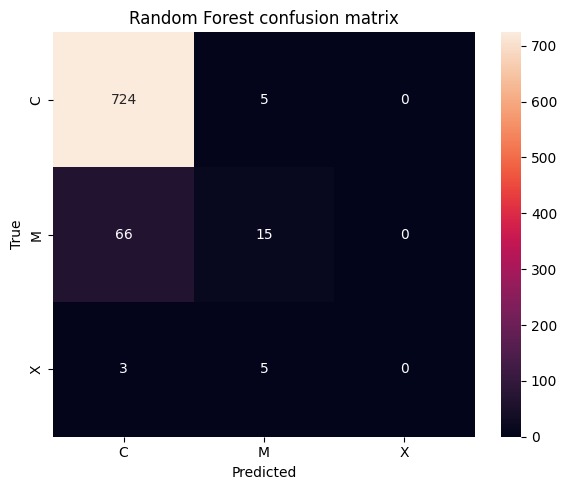

In [17]:
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("RF accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf, target_names=classes))

cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6,5))
sns.heatmap(cm_rf, annot=True, fmt="d", xticklabels=classes, yticklabels=classes)
plt.title("Random Forest confusion matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.savefig(f"{VIS_DIR}/rf_confusion_matrix.png", dpi=160)
plt.show()

# 6. SVM fit evaluate save

SVM accuracy: 0.902200488997555
              precision    recall  f1-score   support

           C       0.90      1.00      0.95       729
           M       0.77      0.12      0.21        81
           X       0.00      0.00      0.00         8

    accuracy                           0.90       818
   macro avg       0.56      0.37      0.39       818
weighted avg       0.88      0.90      0.87       818



/Users/martintrujillo/Library/Python/3.13/lib/python/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/martintrujillo/Library/Python/3.13/lib/python/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/martintrujillo/Library/Python/3.13/lib/python/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"

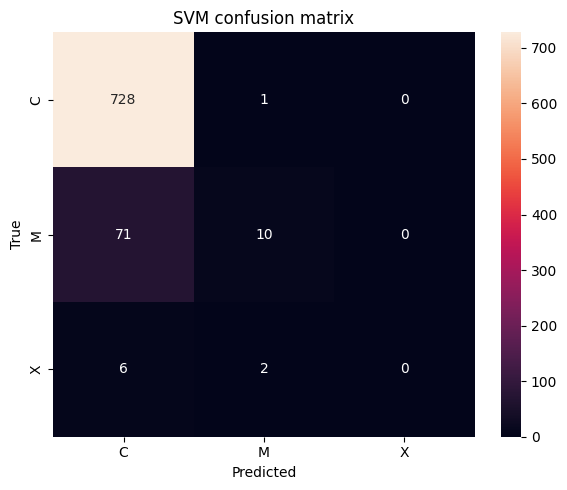

In [18]:
svm_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("svc", SVC(kernel="rbf", C=2.0, gamma="scale", probability=False, random_state=42))
])
svm_pipe.fit(X_train, y_train)
y_pred_svm = svm_pipe.predict(X_test)

print("SVM accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm, target_names=classes))

cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(6,5))
sns.heatmap(cm_svm, annot=True, fmt="d", xticklabels=classes, yticklabels=classes)
plt.title("SVM confusion matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.savefig(f"{VIS_DIR}/svm_confusion_matrix.png", dpi=160)
plt.show()

# 7. Cross validation on full data

In [19]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

rf_cv = cross_val_score(rf, X, y, cv=cv, n_jobs=-1)
svm_cv = cross_val_score(
    Pipeline([("scaler", StandardScaler()), ("svc", SVC(kernel="rbf", C=2.0, gamma="scale"))]),
    X, y, cv=cv, n_jobs=-1
)

print("RF CV mean:", rf_cv.mean(), "std:", rf_cv.std())
print("SVM CV mean:", svm_cv.mean(), "std:", svm_cv.std())

RF CV mean: 0.9009779951100244 std: 0.002319519066138192
SVM CV mean: 0.9031784841075794 std: 0.002493408075106486


# 8. RF feature importance plot save

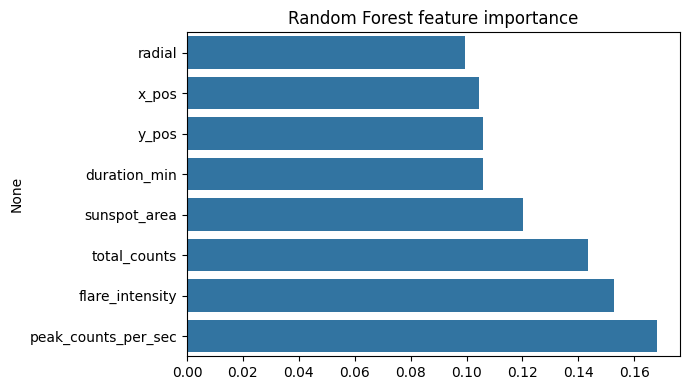

In [20]:
imp = pd.Series(rf.feature_importances_, index=features).sort_values(ascending=True)

plt.figure(figsize=(7,4))
sns.barplot(x=imp.values, y=imp.index)
plt.title("Random Forest feature importance")
plt.tight_layout()
plt.savefig(f"{VIS_DIR}/rf_feature_importance.png", dpi=160)
plt.show()

imp.to_csv(f"{VIS_DIR}/rf_feature_importance.csv", index=True)

# 9. Metrics table save

In [21]:
from sklearn.metrics import precision_recall_fscore_support

def metrics_table(y_true, y_pred, label_names):
    p, r, f1, support = precision_recall_fscore_support(y_true, y_pred, labels=range(len(label_names)))
    return pd.DataFrame({
        "class": label_names,
        "precision": p,
        "recall": r,
        "f1": f1,
        "support": support
    })

rf_tbl = metrics_table(y_test, y_pred_rf, classes)
svm_tbl = metrics_table(y_test, y_pred_svm, classes)

summary = pd.DataFrame({
    "model": ["RandomForest", "SVM"],
    "accuracy": [accuracy_score(y_test, y_pred_rf), accuracy_score(y_test, y_pred_svm)],
    "cv_mean": [rf_cv.mean(), svm_cv.mean()],
    "cv_std": [rf_cv.std(), svm_cv.std()]
})

rf_tbl.to_csv(f"{VIS_DIR}/rf_class_metrics.csv", index=False)
svm_tbl.to_csv(f"{VIS_DIR}/svm_class_metrics.csv", index=False)
summary.to_csv(f"{VIS_DIR}/summary_overall_metrics.csv", index=False)

summary

/Users/martintrujillo/Library/Python/3.13/lib/python/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/martintrujillo/Library/Python/3.13/lib/python/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


,model,accuracy,cv_mean,cv_std
0,RandomForest,0.903423,0.900978,0.002320
1,SVM,0.902200,0.903178,0.002493


# 10. Quick Summary

In [22]:
lines = []
lines.append("# Activity 2 classification summary")
lines.append("")
lines.append("Data set columns used:")
lines.append(", ".join(features))
lines.append("")
lines.append("Label classes:")
lines.append(", ".join(classes))
lines.append("")
lines.append("Random Forest")
lines.append(f"test accuracy {accuracy_score(y_test, y_pred_rf):.4f}")
lines.append(f"cv mean {rf_cv.mean():.4f} cv std {rf_cv.std():.4f}")
lines.append("figure rf_confusion_matrix.png and rf_feature_importance.png")
lines.append("")
lines.append("SVM")
lines.append(f"test accuracy {accuracy_score(y_test, y_pred_svm):.4f}")
lines.append(f"cv mean {svm_cv.mean():.4f} cv std {svm_cv.std():.4f}")
lines.append("figure svm_confusion_matrix.png")
text = "\n".join(lines)

with open(f"{VIS_DIR}/activity2_summary.md", "w", encoding="utf8") as f:
    f.write(text)

print(text)

# Activity 2 classification summary

Data set columns used:
duration_min, peak_counts_per_sec, total_counts, x_pos, y_pos, radial, sunspot_area, flare_intensity

Label classes:
C, M, X

Random Forest
test accuracy 0.9034
cv mean 0.9010 cv std 0.0023
figure rf_confusion_matrix.png and rf_feature_importance.png

SVM
test accuracy 0.9022
cv mean 0.9032 cv std 0.0025
figure svm_confusion_matrix.png
